# TorchVision Utility Functions and Models

In this lab, you'll move from theory to practice by harnessing the power of the `torchvision` library. In today's AI landscape, the challenge isn't just building models from scratch, but deploying powerful, accurate, and interpretable solutions efficiently. This is where `torchvision` becomes an indispensable part of your toolkit. This lab is designed to take you beyond theory and immerse you in the professional workflow of using state-of-the-art, pre-trained models to solve real-world problems.

In this lab, you will see how to:

* Use `torchvision` utilities to visualize model predictions with **bounding boxes** and **segmentation masks**.

* Inspect pre-trained models to understand their architecture and identify their output classes.

* Perform **inference** with pre-trained models for classification, segmentation, and object detection.

The lab culminates in a hands-on "Try it Yourself!" section where you will run these models on your own uploaded images, solidifying your understanding and preparing you for real-world projects.

## Imports

In [2]:
from pprint import pprint

import torch
import torchvision.models as tv_models
import torchvision.transforms as transforms
import torchvision.utils as vutils
from IPython.display import Image as DisplayImage
from PIL import Image
from torchvision.io import decode_image

import helper_utils

## TorchVision Utilities for Image Annotation

A model's output, whether a set of coordinates or a dense map of class scores, is abstract data until you can see it. How do you know if your object detector is working correctly? You draw its predictions directly onto the image. This act of visualization is a fundamental step in any computer vision project, turning raw tensor data into clear, human-understandable results.

In this section, you will see two of TorchVision's most practical utilities in action:

* `draw_bounding_boxes` for placing boxes around objects a model has identified.

* `draw_segmentation_masks` for overlaying detailed, pixel-level masks on specific objects.

These functions are your primary tools for debugging, evaluating model performance, and creating compelling visual demonstrations of your work.

### Drawing Bounding Boxes

An object detection model's main job is to find objects and pinpoint their locations. The classic and most direct way to visualize this location data is by drawing **bounding boxes**, simple rectangles that frame each detected object.

You'll use the `draw_bounding_boxes` function to perform this task. It takes your original image and a set of box coordinates to instantly create a clear visual representation of your model's findings. This is the exact technique used in applications ranging from self-driving cars identifying pedestrians to automated checkout systems logging products.

* Define hardcoded coordinates for two bounding boxes.
    * In practical scenarios, these coordinates are returned by a detection model.
* Define a list of strings, `labels`, corresponding to each bounding box.
* Use <code>[draw_bounding_boxes()](https://docs.pytorch.org/vision/main/generated/torchvision.utils.draw_bounding_boxes.html)</code> to draw the defined bounding boxes.
    * `image`: The `uint8` or `float` tensor of shape (`C, H, W`) on which to draw the boxes.
    * `boxes`: A tensor of shape (`N, 4`), where `N` is the number of boxes and `4` corresponds to the (`xmin, ymin, xmax, ymax`) coordinates.
    * `labels`: List of strings to display each bounding box.
    * `colors`: List of colors used to represent each label or object. Each color corresponds to a specific object detected and is used when drawing its bounding box.
    * `width=3`: Sets the pixel line width for the bounding box to 3.

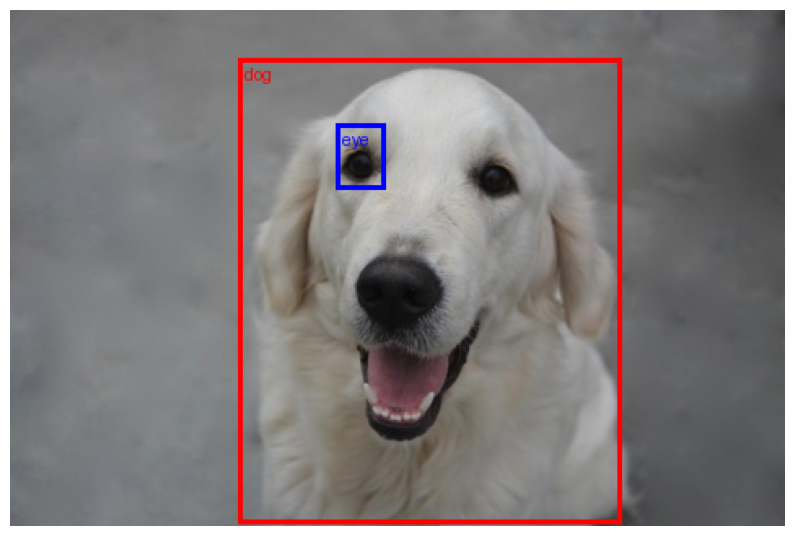

In [3]:
# Load the image
image = decode_image('./images/dog1.jpg')

# Sample bounding boxes, where each box is in (xmin, ymin, xmax, ymax) format
# The first box is set to draw around the whole dog, the other to draw around the left eye
boxes = torch.tensor([[140, 30, 375, 315], [200, 70, 230, 110]], dtype=torch.float)

# Corresponding labels for the detected objects
labels = ["dog", "eye"]

# Draw boxes on the image
result = vutils.draw_bounding_boxes(image=image, 
                                    boxes=boxes, 
                                    labels=labels,           # This is optional
                                    colors=["red", "blue"],  # This is optional. By default, random colors are generated for boxes.
                                    width=3                  # This is optional. The default is width=1
                                   )

# Display the result
helper_utils.display_images(processed_image=result, figsize=(10, 10))

### Drawing Segmentation Masks

While bounding boxes tell you *where* an object is, sometimes you need to know its exact **shape**. For tasks requiring a higher level of precision, you must go beyond boxes and classify every single pixel of an object.

This is the job of image segmentation, which generates a **segmentation mask**, a pixel-perfect overlay that highlights an object's precise silhouette. This detailed understanding is indispensable in advanced applications. For example, a self-driving car uses segmentation to understand the exact boundary of the road, and medical imaging models rely on it to outline tumors with clinical accuracy.

You will use the `draw_segmentation_masks` function to bring these intricate predictions to life on an image.

* Load the pre-calculated `object_mask` from a file.
    * For demonstration purposes, this mask was pre-calculated only to work on the `dog1.jpg`.
    * In practical scenarios, the masks are returned by a segmentation model.
* Use <code>[draw_segmentation_masks()](https://docs.pytorch.org/vision/main/generated/torchvision.utils.draw_segmentation_masks.html)</code> to draw the defined segmentation mask.
    * `image`: The `uint8` or `float` tensor of shape (`3, H, W`) on which to draw the masks.
    * `masks`: A **boolean** tensor of shape (`num_masks, H, W`) or (`H, W`), where `num_masks` is the number of masks and `True` values indicate the pixels to be colored.
    * `alpha`: A **float** between `0` (fully transparent) and `1` (fully opaque) that controls the mask's transparency.
    * `colors`: List of colors used to represent each object. Each color corresponds to a detected object and is used when drawing its mask.

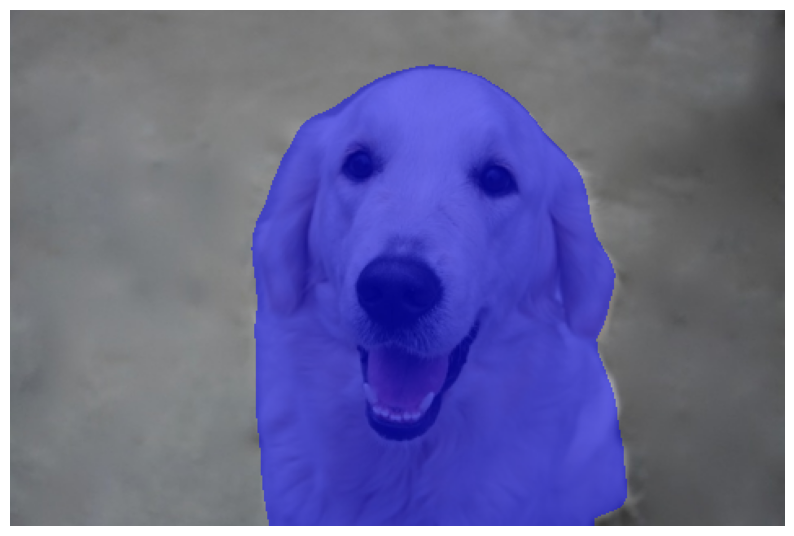

In [4]:
# Load the pre-saved segmentation mask
mask_filename = "dog_segmentation_mask.pt"
loaded_object_mask = torch.load(mask_filename)

# Make it (1, H, W)
object_mask = loaded_object_mask.unsqueeze(0)


# Draw segmentation mask on the image
result  = vutils.draw_segmentation_masks(image=image,
                                         masks=object_mask,
                                         alpha=0.5,          # This is optional. The default is alpha=0.8
                                         colors=["blue"]     # This is optional. By default, random colors are generated for each mask.
                                        )

# Display the result
helper_utils.display_images(processed_image=result, figsize=(10, 10))

## Your Toolkit of Pre-trained Models

Training a major computer vision model from scratch is a monumental effort, requiring huge datasets and weeks of GPU time. TorchVision gives you a powerful shortcut: a professional library of **pre-trained models**.

Think of these as expert models that have already been trained on massive datasets like ImageNet or COCO. They come with a built-in understanding of visual features, from simple textures to complex objects like faces and vehicles. You can now use this expert knowledge as a powerful starting point for your own projects.

**A Tour of Available Architectures**

TorchVision organizes its models by the primary task they were designed to solve. Here are the main categories:

* **Image Classification**: Answers the basic question: 'What is the main subject of this image?'
    * **Models**: [ResNet](https://docs.pytorch.org/vision/main/models/resnet.html), [VGG](https://docs.pytorch.org/vision/main/models/vgg.html), [AlexNet](https://docs.pytorch.org/vision/main/models/generated/torchvision.models.alexnet.html), [SqueezeNet](https://docs.pytorch.org/vision/main/models/squeezenet.html), [MobileNetV3](https://docs.pytorch.org/vision/main/models/mobilenetv3.html), [DenseNet](https://docs.pytorch.org/vision/main/models/densenet.html)
* **Image Segmentation**: Goes deeper to ask: 'What is the exact pixel-by-pixel shape of each object?'
    * **Models**: [FCN](https://docs.pytorch.org/vision/main/models/fcn.html), [DeepLabV3](https://docs.pytorch.org/vision/main/models/deeplabv3.html)
* **Object Detection**: Finds all recognizable objects in an image, draws a box around each one, and classifies them.
    * **Models**: [Faster R-CNN](https://docs.pytorch.org/vision/main/models/faster_rcnn.html), [RetinaNet](https://docs.pytorch.org/vision/main/models/retinanet.html), [SSD](https://docs.pytorch.org/vision/main/models/ssd.html)
* **Video Classification**: Understands action and movement by classifying entire video clips.
    * **Models**: [R(2+1)D 18](https://docs.pytorch.org/vision/main/models/generated/torchvision.models.video.r2plus1d_18.html), [MC3 18](https://docs.pytorch.org/vision/main/models/generated/torchvision.models.video.mc3_18.html), [Video MViT](https://docs.pytorch.org/vision/main/models/video_mvit.html)

**Two Strategies for Using These Models**

There are two primary strategies for integrating these models into your work:

* **Inference (Out-of-the-Box Prediction)**: You use a model's existing knowledge directly to make predictions. This is perfect when your task is very similar to what the model was originally trained on.

* **Transfer Learning (Fine-Tuning)**: You adapt a pre-trained model for a new, specialized task by leveraging its existing expert knowledge. This is a highly flexible strategy that gives you precise control over how the model learns your new data. The approach can range from only training a new final layer on top of the frozen base model to selectively fine-tuning deeper layers, or even retraining the entire network on your custom dataset. This powerful technique allows you to achieve excellent results much faster and with less data than training from scratch.

In this lab, you will focus entirely on the first strategy: **performing inference**. You will see transfer learning in action in the next lab.

### Knowing What Your Model Knows: Classes and Capabilities

Before using a pre-trained model, you need to perform a quick but vital sanity check. Think of it like reading the label on a tool before you use it: you need to know exactly what it was designed to do. Specifically, you need to answer two questions:

* **How many classes** can this model predict?

* **What are the names** of those classes?

This simple investigation prevents major headaches. For example, if your project requires detecting dogs, you must first confirm that the model you've chosen actually includes 'dog' in its list of recognized classes. Answering this question upfront saves you from wasting time on a model that can't perform your specific task.

How you find this information depends on the model's age. Here’s a generic, two-step approach that you can apply to any model.

#### Method 1: The Modern Approach (Check for Metadata First)

Modern TorchVision models make this easy by embedding this information directly into the model's weights object under a `.meta` attribute. This is the official, most reliable source of truth, and you should **always check this first**.

To streamline this process, you will use the provided `get_model_classes_from_weights_meta` helper function, which automatically inspects the weights object and prints the class list for you.

In [5]:
def get_model_classes_from_weights_meta(model, weights_obj=None):
    """
    Inspects a model's weights object to find and return the class names.
    
    Args:
        model: The model instance.
        weights_obj: The weights enumeration object (e.g., ResNet50_Weights.DEFAULT).
    
    Returns:
        A tuple containing (number_of_classes, list_of_class_names), or (None, None) if not found.
    """
    num_classes = None
    class_names = None

    # Check if a weights object was provided and if it has the necessary metadata
    if weights_obj and hasattr(weights_obj, 'meta') and "categories" in weights_obj.meta:
        class_names = weights_obj.meta["categories"]
        num_classes = len(class_names)
        print(f"Model is configured for {num_classes} classes based on Weights Metadata. These classes are:\n")
        # For nice printing, let's display the list
        pprint(class_names)
            
        return num_classes, class_names

    else:
        print("'categories' metadata not found for this model.")
        return num_classes, class_names

* For this example, you'll inspect a [deeplabv3_resnet50](https://docs.pytorch.org/vision/main/models/generated/torchvision.models.segmentation.deeplabv3_resnet50.html) model, which is used for image segmentation.
* From the [weights of this particular model](https://docs.pytorch.org/vision/main/models/generated/torchvision.models.segmentation.deeplabv3_resnet50.html#torchvision.models.segmentation.DeepLabV3_ResNet50_Weights), you’ll use `DeepLabV3_ResNet50_Weights.DEFAULT`. Here, `.DEFAULT` is an alias that automatically points to the best and most current pre-trained weights available for this model.
    * Using `.DEFAULT` is considered best practice, as it makes your code more robust and future-proof.

In [6]:
# Defining the model itself without weights for now
seg_model = tv_models.segmentation.deeplabv3_resnet50(weights=None)

# Select the specific pre-trained weights you want to inspect for your selected model
seg_model_weights = tv_models.segmentation.DeepLabV3_ResNet50_Weights.DEFAULT

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /Users/abinav92/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


100%|██████████| 97.8M/97.8M [00:01<00:00, 74.6MB/s]


* Use the helper function to get the class information.

In [7]:
# Call the helper function to inspect the provided weights object.
num_classes, class_names_deeplabv3 = get_model_classes_from_weights_meta(
    model=seg_model,              # The model architecture.
    weights_obj=seg_model_weights # The weights object containing the .meta attribute to inspect.
)

Model is configured for 21 classes based on Weights Metadata. These classes are:

['__background__',
 'aeroplane',
 'bicycle',
 'bird',
 'boat',
 'bottle',
 'bus',
 'car',
 'cat',
 'chair',
 'cow',
 'diningtable',
 'dog',
 'horse',
 'motorbike',
 'person',
 'pottedplant',
 'sheep',
 'sofa',
 'train',
 'tvmonitor']


<br>

As you can see, the helper function successfully extracted the 21 class names directly from the weights object. Now you can confidently decide if this model, with these specified weights, is right for your task.

Bringing back the earlier example, if your goal was to find a 'dog', you can now scan this list and confirm that `'dog'` is a recognized class. This tells you the model is a suitable choice. If 'dog' hadn't been on the list, you would know immediately that you need to find a different model and weights, saving you valuable time.

#### Method 2: The Manual Approach (When No Metadata Exists)

What do you do when a model doesn't have the `.meta` attribute? This is a common scenario you'll encounter with older models loaded via the `pretrained=True` flag, or with custom models that don't have this information packaged with them.

In these situations, you need to put on your detective hat. You'll investigate the model's architecture directly to uncover the information you need. This manual inspection is a fundamental skill, ensuring you can work effectively with any model, not just the newest ones.

* Let's use an older [Resnet50](https://docs.pytorch.org/vision/main/models/generated/torchvision.models.resnet50.html) model as an example.
    * You will load it using the legacy `pretrained=True` method, which automatically fetches its standard weights pre-trained on the ImageNet 1K dataset.

First, confirm that this loading method indeed lacks a discoverable `.meta` attribute.

In [8]:
# Instantiate the ResNet50 model using the legacy `pretrained=True` method.
resnet50_model = tv_models.resnet50(pretrained=True)

/Users/abinav92/Documents/DLAI_Pytorch_Techniques_Ecosystem/.venv/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/abinav92/Documents/DLAI_Pytorch_Techniques_Ecosystem/.venv/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


When using `pretrained=True`, the weights are loaded directly into the model's layers. Unlike the modern approach, this doesn't create a separate weights object that holds the `metadata`. Therefore, you'll explicitly pass `weights_obj=None` to the helper function to demonstrate that no such object is available with this method.

In [9]:
# Pass `weights_obj=None` because the `pretrained=True` loading method
# does not create a separate weights object that has a .meta attribute to inspect.
num_classes, class_names = get_model_classes_from_weights_meta(
    model=resnet50_model, 
    weights_obj=None
)

'categories' metadata not found for this model.


<br>

This confirms that this loading method does not provide metadata, which is why you must proceed with manually inspecting the model's architecture.

#### Manually Inspecting the Architecture

Since the metadata approach was a dead end, your next step is to inspect the model's blueprint directly. Your goal is to find the final layer of the network, as its configuration will tell you how many classes the model predicts.

The specific clue you're looking for is the `out_features` parameter in the model's final `Linear` (fully-connected) layer. The most straightforward way to find this is to print the model object itself:

```
print(resnet50_model)
```

This will print the entire model architecture, which can be quite long. You only need to focus on the last few lines of the output. For `ResNet50`, you'll find a layer named `fc` that contains the answer:


```
...
  (avgpool): AdaptiveAvgPool2d(output_size=(1, 1))
  (fc): Linear(in_features=2048, out_features=1000, bias=True)
)
```

In [10]:
# ### Uncomment and execute the line below if you wish print the model's architecture.

print(resnet50_model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

<br>

The `out_features=1000` tells you that the model is configured for 1000 classes. You can access this value directly in the code to confirm.

In [11]:
# Get the number of output features from the layer named 'fc'
num_classes = resnet50_model.fc.out_features

print(f"Inspecting the model's .fc layer: It has {num_classes} output classes.")

Inspecting the model's .fc layer: It has 1000 output classes.


#### Finding the Class Names

Your detective work is almost complete. You've discovered that the model predicts 1000 classes, but a class **index** (like `248`) is meaningless without a class **name** (like `'bull mastiff'`). The final step is to find the legend that maps these indices to human-readable names. As you've learned, this information is stored **externally** from the model file.

For a model like `ResNet50` (legacy variant) trained on `ImageNet`, this class list is well-documented. Here are the first places a professional would look:

* **Official Documentation: Always start here**. The PyTorch documentation for a model or its weights will almost always describe the dataset it was trained on and provide a link to the class list.

* **Community Helper Files**: Code repositories and online tutorials are another excellent source. You can often find helper files (like a `.json` or `.txt`) that contain the direct index-to-name mapping.

In the next section, you'll use one such helper file to load the ImageNet class names from a `.json` file and then perform classification.

## Performing Inference with Pre-trained Models

Now that you know how to investigate a model's capabilities, it's time to put that knowledge into practice. You'll perform **inference** using a model "off-the-shelf" to get predictions on new images.

You will apply this principle to the two models you've already inspected:

* **Image Segmentation**: You'll use `DeepLabV3` to find and draw a pixel-perfect mask over an object.

* **Image Classification**: You'll use the legacy `ResNet50` to predict the main subject of an image.

### Image Segmentation

Your first task is to perform **image segmentation** with the `DeepLabV3` model. The goal is straightforward: find a dog in an image and generate a pixel-perfect mask that highlights its exact shape.

* You'll begin by loading an image.

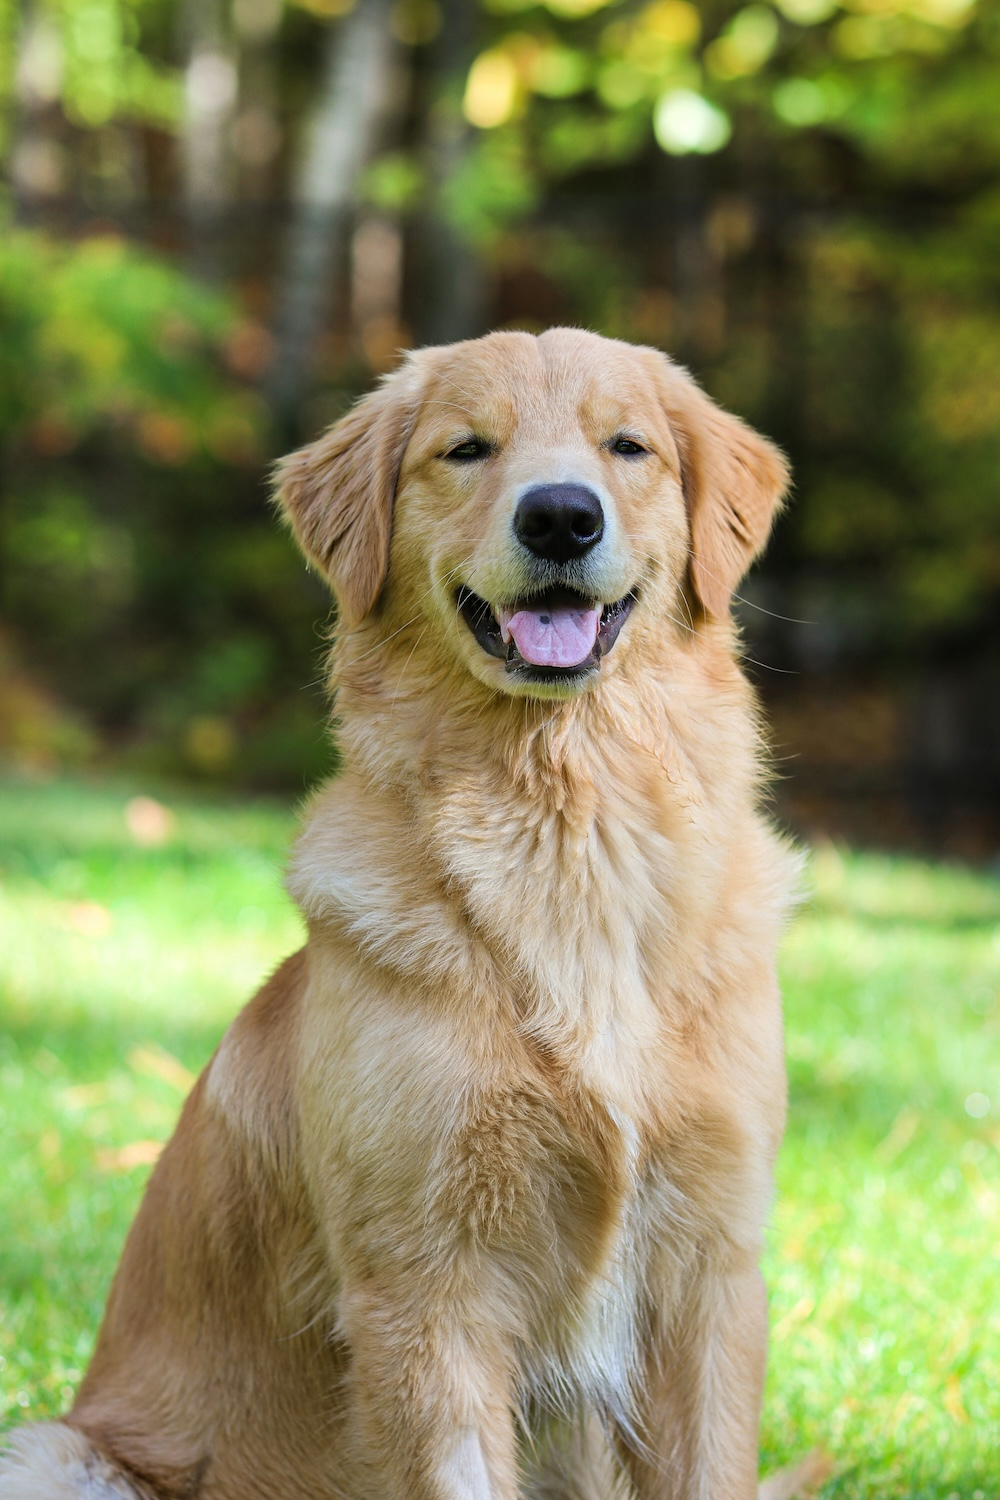

In [12]:
# Define the file path for the image.
image_path = './images/dog2.jpg'

# Display the image.
DisplayImage(image_path, width=300, height=450)

<br>

In your earlier investigation, you confirmed that the `DeepLabV3` model's class list includes `'dog'`, making it the right tool for this task.

* Now you'll load the model again, this time attaching its pre-trained `.DEFAULT` weights and calling `.eval()` to prepare it for inference.
    * **Note on the Download**: A larger file will download now because you're loading the complete model (backbone + head). The class list you checked earlier remains correct, as you're still using the `.DEFAULT` weights.

In [13]:
# Instantiate the model architecture and load the pre-trained weights.
seg_model = tv_models.segmentation.deeplabv3_resnet50(weights=seg_model_weights).eval()

Downloading: "https://download.pytorch.org/models/deeplabv3_resnet50_coco-cd0a2569.pth" to /Users/abinav92/.cache/torch/hub/checkpoints/deeplabv3_resnet50_coco-cd0a2569.pth


100%|██████████| 161M/161M [00:02<00:00, 74.9MB/s] 


With your pre-trained `seg_model` loaded and in evaluation mode, you'll now walk through the complete process of performing image segmentation.

* **Prepare Your Tensors**: Start by loading the image. From it, you'll create two tensor versions:

    * `original_image_tensor`: A clean, un-normalized tensor that you'll use later for visualization.
    
    * `input_tensor`: A normalized version of that tensor to be used as the input for the model.
    
* **Define Your Targets and Colors**: Next, you'll define a `target_class_names` list, setting it to just `['dog']` for this example. You'll also create a corresponding `seg_colors` list to assign a color for each target's mask. Finally, you will get the class indices from the `class_names_deeplabv3` list, which you retrieved in the "**Modern Approach**" section.

    * **NOTE:** Each class name in your `target_class_names` list must be an exact, **case-sensitive match** to a name in the model's class list, otherwise the lookup will fail.

In [14]:
# Load the base PIL Image
img = Image.open(image_path)

# Create the clean, un-normalized tensor for visualization later
original_image_tensor = transforms.ToTensor()(img)

# Define the normalization transform
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                                 std=[0.229, 0.224, 0.225])

# Create the normalized input tensor for the model
# .unsqueeze(0) adds a batch dimension, changing the tensor shape 
# from [C, H, W] to [N, C, H, W], as models expect a batch of images for input
input_tensor = normalize(original_image_tensor).unsqueeze(0)

# Define a list of target classes you want to find
target_class_names = ['dog'] # More classes can be added as well, e.g., ['dog', 'person', ...]

# Define a corresponding list of colors for the segmentation masks for each class
seg_colors = ["blue"]

# Use a list comprehension to get a list of corresponding class indices
class_indices = [class_names_deeplabv3.index(name) for name in target_class_names]

# Print the results for confirmation
print(f"Target Classes:        {target_class_names}")
print(f"Corresponding Indices: {class_indices}")

Target Classes:        ['dog']
Corresponding Indices: [12]


<br>

* **Perform Inference**: Pass the normalized `input_tensor` to the pre-trained `seg_model`. The model returns its predictions in a dictionary, so you'll use `['out'][0]` to access the raw output scores (logits) for the first (and only) image in the batch.

In [15]:
# Generate prediction
with torch.no_grad():
    output = seg_model(input_tensor)['out'][0]

* **Generate the Final Mask**: Convert the raw scores into a **stack of boolean masks**, one for each of your target classes (in this case, just for the `'dog'` class). This involves three steps:

    * First, using `.argmax(0)` to get the model's single best prediction for each pixel.

    * Second, creating a list of **individual boolean masks**, where each mask corresponds to one of your target classes.

    * Finally, using `torch.stack()` to combine this list of masks into a single tensor. This is the required format for drawing multiple masks with different colors.

In [16]:
# Get the predicted class for each pixel by finding the class with the highest score.
output_predictions = output.argmax(0)

# Create a separate boolean mask for each of your target classes.
# The result is a list of boolean tensors, one for each class index.
individual_masks = [(output_predictions == i) for i in class_indices]

# Stack the individual masks into a single tensor of shape (num_masks, H, W).
stacked_masks = torch.stack(individual_masks, dim=0)

* **Draw Mask**: Use `draw_segmentation_masks` to overlay your generated masks onto the original image, passing these key arguments:

    * `image=(original_image_tensor * 255).byte()`: Converts the `original_image_tensor` from a `float` (0.0-1.0 scale) to a `uint8` tensor (0-255 scale), as required by the function.
    
    * `masks=stacked_masks`: The tensor of shape `(num_masks, H, W)` that you created, where each layer is a boolean mask for one of your target classes.

    * `colors=seg_colors`: The list of color strings you defined. The function will use these to draw each corresponding mask in the `stacked_masks` tensor.

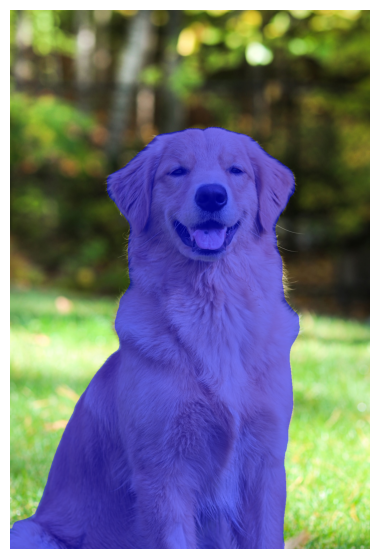

In [17]:
# Apply segmentation masks using the stacked_masks tensor.
result = vutils.draw_segmentation_masks(image=(original_image_tensor * 255).byte(),
                                        masks=stacked_masks,
                                        alpha=0.5,
                                        colors=seg_colors)
# Visualize the mask
helper_utils.display_images(processed_image=result, figsize=(7, 7))

### Image Classification

For your second inference task, you'll switch to **image classification**. Using the same image as before, your goal is to have a model predict the single most likely class for the entire image. For this, you'll use the [Resnet50](https://docs.pytorch.org/vision/main/models/generated/torchvision.models.resnet50.html) model.

* Load the model with its legacy weights by setting `pretrained=True`.
    * Also set the model to evaluation mode.

In [18]:
# Load the ResNet50 model, using the legacy weights and set it to .eval()
resnet50_model = tv_models.resnet50(pretrained=True).eval()

Your manual investigation from earlier revealed that the  `ResNet50` model **with these legacy weights (`pretrained=True`)** predicts 1000 classes,. To make sense of these predictions, you need to find the corresponding list of class names.

As you've learned, this information isn't packaged with the model itself. For a standard dataset like ImageNet, this "legend" is commonly distributed in an external `.json` file. In the next cell, you will:

* Use the `load_imagenet_classes` helper function to load the class mappings from the `'./imagenet_class_index.json'` file.

* This creates a Python **dictionary** that maps each class index to its human-readable name.

**Note**: This manual step of loading an external file is only necessary because you used the legacy `pretrained=True` method. Had you used a modern weights object (e.g., `ResNet50_Weights.IMAGENET1K_V2`), you could have simply used the `.meta` attribute, as you did with `DeepLabV3`.

In [19]:
# Use the helper function to load the class index-to-name mappings from the JSON file.
imagenet_classes = helper_utils.load_imagenet_classes('./imagenet_class_index.json')

Loading ImageNet class index from: ./imagenet_class_index.json
Successfully loaded the class index.


<br>

* Instead of printing all 1000 classes, the code cell below is set up to inspect a specific "slice" of the dictionary, starting at index `200`. This range contains a number of dog breeds.

* When you run the cell, pay attention to **index `207`**. You'll find it corresponds to `'golden_retriever'`, the perfect match for the dog in the image you're about to classify.

    * After running it once, feel free to change the `start_index` and `num_to_print` values to explore other sections of the class list.

In [20]:
print("Total Classes:", len(imagenet_classes), "\n")

# Define the starting index and how many classes you want to print
start_index = 200
num_to_print = 10

print(f"Printing {num_to_print} classes starting from index {start_index}:\n")

# Loop through the desired range of indices
for i in range(start_index, start_index + num_to_print):
    key = str(i)
    value = imagenet_classes[key]
    print(f"Index {key}: {value}")

Total Classes: 1000 

Printing 10 classes starting from index 200:

Index 200: ['n02097474', 'Tibetan_terrier']
Index 201: ['n02097658', 'silky_terrier']
Index 202: ['n02098105', 'soft-coated_wheaten_terrier']
Index 203: ['n02098286', 'West_Highland_white_terrier']
Index 204: ['n02098413', 'Lhasa']
Index 205: ['n02099267', 'flat-coated_retriever']
Index 206: ['n02099429', 'curly-coated_retriever']
Index 207: ['n02099601', 'golden_retriever']
Index 208: ['n02099712', 'Labrador_retriever']
Index 209: ['n02099849', 'Chesapeake_Bay_retriever']


<br>

With your `ResNet50` model and class names loaded, you'll now walk through the process of classifying the image.

* **Prepare the Image**: Define a `transform` pipeline to resize, crop, and normalize the image to match the format the model was trained on. You'll then apply this pipeline to your image and use `.unsqueeze(0)` to create a batch of one for the model input.

**Important Note**: When preparing an image for a pre-trained model, it is **highly recommended** that the final input tensor have the **same dimensions** and **normalization** as the data the model was trained on. Models like `ResNet50` expect a specific input size (e.g., 224x224 pixels) and data distribution. A mismatch in either can cause errors or significantly degrade performance. The transformation pipeline below is the standard method for achieving this format for models trained on ImageNet.

In [21]:
# Load the base PIL Image
img = Image.open(image_path)

# Define the transformation pipeline
transform = transforms.Compose([
    transforms.Resize(256),
    # Models like ResNet50 expect a 224x224 input, so you resize to a slightly
    # larger image and then take a center crop of the target dimensions.
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    # Normalize the tensor with the mean and standard deviation from the ImageNet dataset.
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Apply the transforms and add a batch dimension
input_tensor = transform(img)
# Model's input layer expects a 4D tensor with a specific shape: [N, C, H, W]
input_batch = input_tensor.unsqueeze(0)

* **Perform Inference**: Pass the prepared `input_batch` to the pre-trained `resnet50_model`. The model will output a tensor of raw, unnormalized scores/logits, one score for each of the 1000 ImageNet classes.

In [22]:
# Perform Inference
with torch.no_grad():
    output = resnet50_model(input_batch)

* **Convert Scores to Probabilities**: Apply the <code>[torch.nn.functional.softmax()](https://docs.pytorch.org/docs/stable/generated/torch.nn.functional.softmax.html)</code> function to the logits.
    * This converts the raw scores into a probability distribution where each value represents the model's confidence for a particular class, and all probabilities sum to 1.

In [24]:
# Apply softmax for probabilities
# Apply it to the first (and only) item in the output batch.
probabilities = torch.nn.functional.softmax(output[0], dim=0)

* **Get the Top Predictions**: Use <code>[torch.topk()](https://docs.pytorch.org/docs/stable/generated/torch.topk.html)</code> to efficiently find the `top` classes with the highest probabilities and get their corresponding class IDs (indices).

In [25]:
# Get the `top` probabilities and their corresponding class IDs
top = 5
top_prob, top_catid = torch.topk(probabilities, top)

* **Display the Results**: Loop through the `top` results. For each one, you'll use its class ID to look up the human-readable name in the `imagenet_classes` dictionary and print it alongside its confidence score.

In [26]:
# Convert IDs to class names and print results
print(f"Top {top} predictions:")
for i in range(top_prob.size(0)):
    # Get the string representation of the class ID
    class_id_str = str(top_catid[i].item())
    
    # Look up the class name in the dictionary
    class_name = imagenet_classes[class_id_str][1]
    confidence = top_prob[i].item() * 100
    print(f"\tTop-{i+1}: {class_name} ({confidence:.2f}%)")

Top 5 predictions:
	Top-1: golden_retriever (96.83%)
	Top-2: Labrador_retriever (2.12%)
	Top-3: flat-coated_retriever (0.27%)
	Top-4: kuvasz (0.17%)
	Top-5: tennis_ball (0.08%)


<br>

As you can see, the model correctly identified the dog as a **`'golden_retriever'`** with high confidence, successfully concluding the lab's core workflow. This lab has walked you through the essential skills of a computer vision practitioner: investigating a model's capabilities, using pre-trained models for inference, and using `torchvision` utilities to visualize the results.

## (Optional) Object Detection

With this solid foundation, the final section offers a hands-on opportunity to see these concepts in action on your own images. You will run provided code that uses a powerful `Faster R-CNN` model to perform **object detection** and **DeepLabV3** to generate segmentation masks. This is a chance to experiment with the provided tools and observe their effects on new data.

### Detecting Objects using `fasterrcnn_resnet50_fpn` Model

The [fasterrcnn_resnet50_fpn](https://docs.pytorch.org/vision/main/models/generated/torchvision.models.detection.fasterrcnn_resnet50_fpn.html) model is a popular and powerful choice for object detection tasks due to the strengths of its combined components:

* `Faster R-CNN (Region-based Convolutional Neural Network)`: This is the core architecture designed specifically for object detection. It efficiently identifies potential object regions (Region Proposal Network) and then classifies these regions and refines their bounding box coordinates. It's known for its good balance between speed and accuracy.

* `ResNet-50 (Residual Network 50)`: This serves as the backbone of the model. ResNet-50 is a deep convolutional neural network with 50 layers, renowned for its ability to learn rich, hierarchical features from images. Its "residual connections" help in training very deep networks effectively, leading to better performance.

* `FPN (Feature Pyramid Network)`: This component enhances the model's ability to detect objects at multiple scales. FPN constructs a pyramid of feature maps with different resolutions, allowing the model to effectively identify both small and large objects within the same image.

In essence, `fasterrcnn_resnet50_fpn` leverages a strong feature extractor (ResNet-50), an effective multi-scale detection strategy (FPN), and a robust object detection framework (Faster R-CNN), making it a well-rounded and high-performing model for locating and classifying various objects in an image. Using `FasterRCNN_ResNet50_FPN_Weights.DEFAULT` ensures you're loading the model with pre-trained weights, typically trained on a large dataset like COCO, which allows it to recognize a wide variety of common objects out-of-the-box.

* Run the cell below to load the model and set it to evaluation mode.

In [27]:
# Load a pre-trained object detection model and set to evaluation mode
bb_model_weights = tv_models.detection.FasterRCNN_ResNet50_FPN_Weights.DEFAULT
bb_model = tv_models.detection.fasterrcnn_resnet50_fpn(weights=bb_model_weights).eval()

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /Users/abinav92/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


100%|██████████| 160M/160M [00:02<00:00, 81.5MB/s] 


#### How many classes can the model detect?

In [28]:
# Use the helper function to inspect the weights object of the object detection model.
num_classes, classes = get_model_classes_from_weights_meta(
    model=bb_model, 
    weights_obj=bb_model_weights
)

Model is configured for 91 classes based on Weights Metadata. These classes are:

['__background__',
 'person',
 'bicycle',
 'car',
 'motorcycle',
 'airplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'N/A',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'N/A',
 'backpack',
 'umbrella',
 'N/A',
 'N/A',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'N/A',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'couch',
 'potted plant',
 'bed',
 'N/A',
 'dining table',
 'N/A',
 'N/A',
 'toilet',
 'N/A',
 'tv',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster'

* As you might have **noticed**, some class indices have `N/A` next to them.
* The model's `91` output classes include `81` recognizable COCO dataset classes, plus 10 additional entries marked as `N/A` (the specific nature of which is not defined in this list).
* If you were to use a standard list of 81 COCO classes instead of this model-specific list, you would encounter index mismatches with the model's output.

* Your goal for this example is to detect cars and traffic lights. First, you'll set the path to an image that contains several of them.

In [29]:
# Set the file path to the image you'll use for car/traffic light detection.
image_path = './images/cars.jpg'

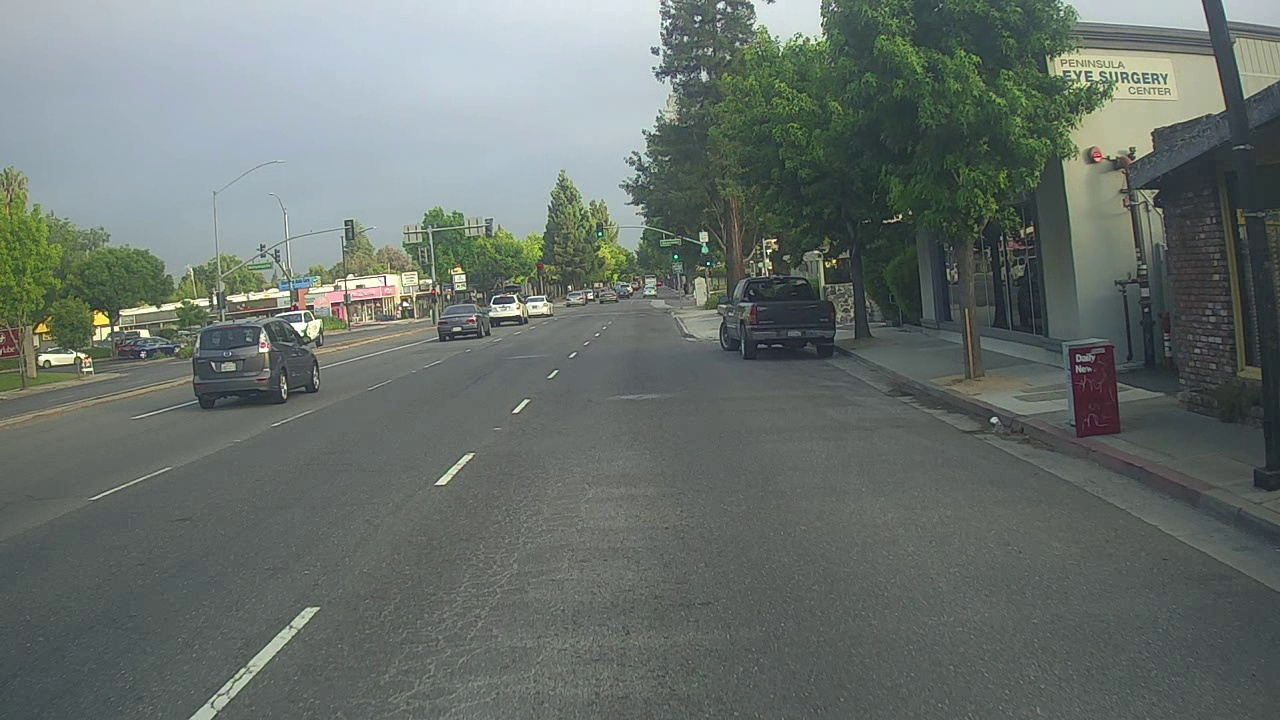

In [30]:
# Display the image
DisplayImage(image_path, width=600, height=550)

* Define the `target_class_names` as a list of strings specifying the objects you want to detect, in this case, `['car', 'traffic light']`.

* Create a `bbox_colors` list with a corresponding color string for each target class's bounding box.

* Generate the `object_indices` list from the target names using a list comprehension.

In [31]:
# Define a list of target classes to detect
target_class_names = ['car', 'traffic light']

# Define a corresponding list of colors for each class's bounding box
bbox_colors = ['red', 'blue']

# Use a list comprehension to get a list of all target indices
object_indices = [classes.index(name) for name in target_class_names]

The function `detect_and_draw_bboxes` is provided to you. It takes the detection model, image path, lists of target objects and their colors, and a confidence threshold. It then returns the image with bounding boxes drawn for all detected target objects.

The core functionality of this function is as follows:

* **Using a Confidence `Threshold`**: A minimum confidence score is used to filter out uncertain detections.

* **Model Prediction & Scoring**: The input image is processed by the model, which outputs potential bounding boxes for all detected objects and assigns confidence scores to each.

* **Filtering Qualifying Boxes**: The function loops through your list of targets and selects only those boxes that:

    * Match one of the **target object classes** you provided.
    
    * Have a confidence score greater than the set `threshold`.

* **Drawing and Returning**: The function collects all qualifying boxes from all your target classes and then uses the `draw_bounding_boxes` utility to draw them onto the image, each with its specified label and color.  The final modified image (or original, if no boxes qualified) is returned.

In [32]:
def detect_and_draw_bboxes(model, image_path, object_indices, labels, bbox_colors, threshold, bbox_width=3):
    """
    Detects and draws labeled bounding boxes for multiple specified object classes on an image.

    Args:
        model: Pre-trained object detection model.
        image_path (str): Path to the image file.
        object_indices (list): List of indices for the target classes to detect.
        labels (list): List of text labels for each target class.
        bbox_colors (list): List of colors for each target class's bounding boxes.
        threshold (float): Confidence threshold for detections.
        bbox_width (int, optional): The line width for the bounding boxes. Defaults to 3.

    Returns:
        torch.Tensor: Image tensor with all detected boxes drawn.
    """
    
    # Open and transform the image, and prepare the result tensor
    pil_image = Image.open(image_path).convert("RGB")
    transform_to_tensor = transforms.Compose([transforms.ToTensor()])
    tensor_image_batch = transform_to_tensor(pil_image).unsqueeze(0)
    result_image_tensor = (tensor_image_batch.squeeze(0) * 255).byte()

    # Perform inference to get predictions for all possible objects
    with torch.no_grad():
        prediction = model(tensor_image_batch)[0]

    # Initialize lists to collect all boxes, labels, and colors that meet the criteria
    all_boxes_to_draw = []
    all_labels_to_draw = []
    all_colors_to_draw = []

    # Loop through each target class to find its boxes
    for index, label, color in zip(object_indices, labels, bbox_colors):
        # Filter predictions for the current class index and confidence threshold
        class_mask = (prediction['labels'] == index) & (prediction['scores'] > threshold)
        
        # Get the boxes for the current class
        boxes_for_this_class = prediction['boxes'][class_mask]

        if boxes_for_this_class.nelement() > 0:
            # Add the found boxes to our master list
            all_boxes_to_draw.extend(boxes_for_this_class.tolist())
            # Create and add corresponding labels and colors
            all_labels_to_draw.extend([label] * len(boxes_for_this_class))
            all_colors_to_draw.extend([color] * len(boxes_for_this_class))

    # After checking all classes, draw all collected boxes at once if any were found
    if all_boxes_to_draw:
        result_image_tensor = vutils.draw_bounding_boxes(
            result_image_tensor,
            torch.tensor(all_boxes_to_draw),
            labels=all_labels_to_draw,
            colors=all_colors_to_draw,
            width=bbox_width
        )
    else:
        # If the list of boxes to draw is empty, print this information.
        print(f"No objects from the list {labels} were found with a confidence score above {threshold}.\n")
    
    return result_image_tensor

* Set a confidence threshold. This value (from 0.0 to 1.0) is the minimum score a detection must have to be considered valid.
    * Feel free to experiment with this value. A lower threshold (e.g., `0.3`) might reveal more objects, while a higher one (e.g., `0.8`) will only show the most confident detections.

In [33]:
confidence_threshold = 0.7

* Execute the function to detect bounding boxes on `car` and `traffic light` in the image.

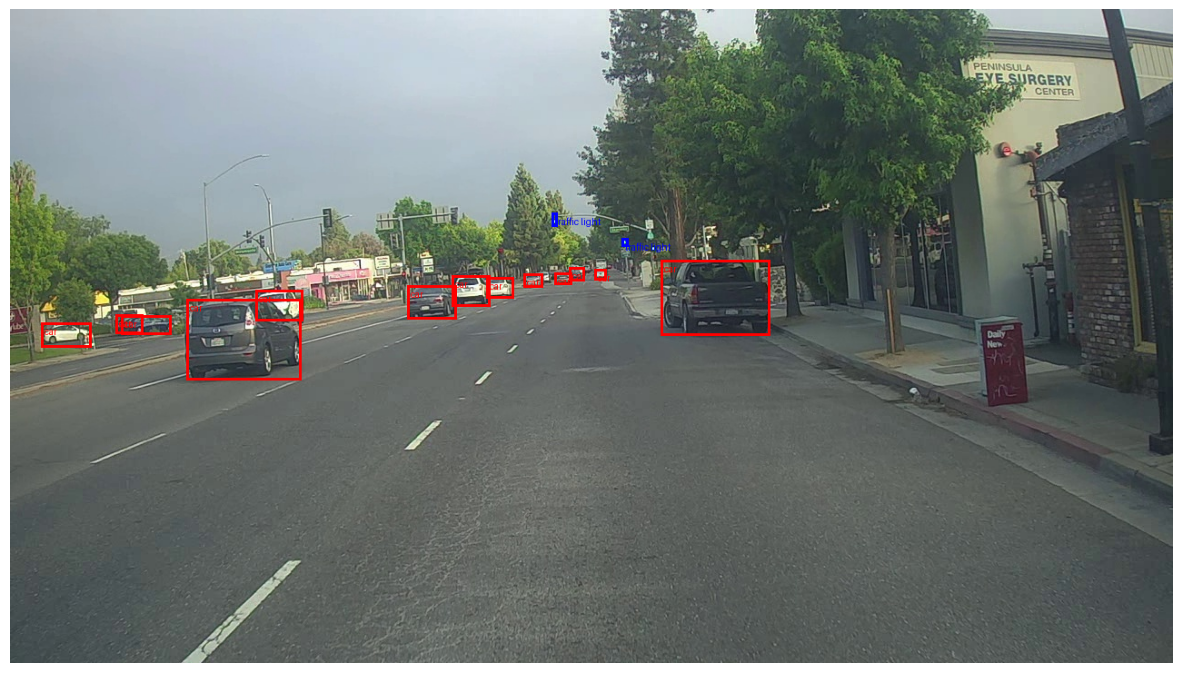

In [34]:
# Execute the main detection function
result_image_tensor = detect_and_draw_bboxes(
    model=bb_model,                  # The pre-trained object detection model.
    image_path=image_path,           # The path to the input image.
    object_indices=object_indices,   # The list of integer indices for the target classes.
    labels=target_class_names,       # The list of string names for the box labels.
    bbox_colors=bbox_colors,         # The list of colors for the bounding boxes.
    threshold=confidence_threshold,  # The minimum confidence score for a detection.
)

# Display the results
helper_utils.display_images(processed_image=result_image_tensor, figsize=(15, 15))

### Try it Yourself!

This is where you can see everything you've learned come together. In this section, you will use the powerful models and functions from this lab, to perform **object detection** and **image segmentation** on your own images. You'll get to upload an image, select your target objects by changing the input variables, and then run the pre-trained models to see them in action on your own data.

### 1 - Find Bounding Boxes on Objects on your Own Images

Running the function `helper_utils.upload_jpg_widget()` will display a widget that allows you to upload your own images into the workspace.

* You can only upload images that have a `.jpg` extension.
* Each image should not exceed **5 MB** in **file size**.
* Once an image is successfully uploaded, you'll see its file path dsiplayed, which you can directly copy and paste into the cell below.

Also, once the widget is displayed, you can use it multiple times to upload images; you don't have to re-run the `helper_utils.upload_jpg_widget()` function.

In [35]:
helper_utils.upload_jpg_widget()

FileUpload(value=(), accept='.jpg,.jpeg', description='Upload JPG (Max 5MB)')

Output()

* Set the path to your image (as displayed above).

* Alternatively, you can use these images that are already present in the workspace:
  ```
  image_path = './images/birds_sheep_dog.jpg'
  image_path = './images/car_bus_tram.jpg'
  image_path = './images/person_and_bicycle.jpg'
  ```
<br>  
* A default path has been set for you, but feel free to change it to a different one.

In [ ]:
image_path = './images/car_bus_tram.jpg' ### Add your image path here

In [ ]:
# Display the image
DisplayImage(image_path, width=500, height=500)

* As a reminder, following are the classes the model can detect.

In [ ]:
detection_classes = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A',
    'N/A', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard',
    'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A',
    'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

* In the code cell below, you'll define the parameters for your object detection task:

    * `target_class_names`: A list of strings for all the objects you want to detect. Each name must be an exact match from the `detection_classes` list above.

    * `bbox_colors`: A corresponding list of color strings for each target class's bounding box.

    * `confidence_threshold`: A value between 0.0 and 1.0 that sets the minimum confidence for a detection to be shown.

* Example values have been set for you. Feel free to change these values to detect different objects in your image or to adjust the detection sensitivity.

In [ ]:
# Define a list of target classes to detect
target_class_names = ['car', 'bus', 'train'] ### Add your target class names here

# Define a corresponding list of colors for each class's bounding box
bbox_colors = ['red', 'purple', 'green'] ### Add your target class names here

# Set the confidence_threshold
confidence_threshold = 0.7 ### Set your threshold here

* Check out the results!

In [ ]:
# Use a list comprehension to get a list of all target indices
object_indices = [detection_classes.index(name) for name in target_class_names]

# Define the label for the object same as the target_class_names
labels = target_class_names

# Execute the main detection function
result_image_tensor = detect_and_draw_bboxes(
    model=bb_model,                  # The pre-trained object detection model.
    image_path=image_path,           # The path to the input image.
    object_indices=object_indices,   # The list of integer indices for the target classes.
    labels=labels,                   # The list of string names for the box labels.
    bbox_colors=bbox_colors,         # The list of colors for the bounding boxes.
    threshold=confidence_threshold,  # The minimum confidence score for a detection.
    bbox_width=5                     # The line thickness for the bounding boxes.
)

# Display the results (feel free to set a different `figsize`)
helper_utils.display_images(processed_image=result_image_tensor, figsize=(10, 10))

### 2 - Generating Segmentation on Objects on your Own Images

Run the function `helper_utils.upload_jpg_widget()` to display the image upload a widget.

In [ ]:
helper_utils.upload_jpg_widget()

* Set the path to your image (as displayed above).

* Alternatively, you can use these images that are already present in the workspace:
  ```
  image_path = './images/birds_sheep_dog.jpg'
  image_path = './images/car_bus_tram.jpg'
  image_path = './images/person_and_bicycle.jpg'
  ```
<br>  
* A default path has been set for you, but feel free to change it to a different one.

In [ ]:
image_path = './images/person_and_bicycle.jpg' ### Add your image path here

In [ ]:
# Display the image
DisplayImage(image_path, width=500, height=500)

* As a reminder, following are the classes the segmentation model can detect.

In [ ]:
segmentation_classes = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car',
    'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person', 
    'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor'
]

In the code cell below, you'll define the parameters for your image segmentation task:

* `target_class_names`: A list of strings for all the objects you want to segment. Each name must be an exact match from the `segmentation_classes` list above.

* `seg_colors`: A corresponding list of color strings for each target class's segmentation mask.

* Example values have been set for you. Feel free to change these values to segment different objects in your image or to use different colors for the masks.

In [ ]:
# Define a list of target classes you want to find
target_class_names = ['person', 'bicycle'] ### Add your target class name here

# Define a corresponding list of colors for the segmentation masks for each class
seg_colors = ["pink", 'yellow'] ### Add your segmentation masks for colors each class here

* Check out the results!

In [ ]:
# Load pre-trained segmentation model
seg_model_weights = tv_models.segmentation.DeepLabV3_ResNet50_Weights.DEFAULT
seg_model = tv_models.segmentation.deeplabv3_resnet50(weights=seg_model_weights).eval()

# Load the base PIL Image
img = Image.open(image_path)

# Create the clean, un-normalized tensor for visualization later
original_image_tensor = transforms.ToTensor()(img)

# Define the normalization transform
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                                 std=[0.229, 0.224, 0.225])

# Create the normalized input tensor for the model
input_tensor = normalize(original_image_tensor).unsqueeze(0)

# Use a list comprehension to get a list of corresponding class indices
class_indices = [segmentation_classes.index(name) for name in target_class_names]

In [ ]:
# Generate prediction
with torch.no_grad():
    output = seg_model(input_tensor)['out'][0]

In [ ]:
# Get the predicted class for each pixel by finding the class with the highest score.
output_predictions = output.argmax(0)

# Create a separate boolean mask for each of your target classes.
individual_masks = [(output_predictions == i) for i in class_indices]

# Stack the individual masks into a single tensor of shape (num_masks, H, W).
stacked_masks = torch.stack(individual_masks, dim=0)

# Apply segmentation masks using the stacked_masks tensor.
result = vutils.draw_segmentation_masks(image=(original_image_tensor * 255).byte(),
                                        masks=stacked_masks,
                                        alpha=0.5,
                                        colors=seg_colors)

# Visualize the mask  (feel free to set a different `figsize`)
helper_utils.display_images(processed_image=result, figsize=(10, 10))

## Conclusion

You've now seen a complete, practical workflow for using `torchvision` to solve common computer vision problems. This lab demonstrated the essential steps of selecting a pre-trained model, understanding its capabilities, preparing your data, and using the model for inference to get tangible results. You saw firsthand how critical visualization is, not just for final outputs, but for understanding and validating each step of the process.

The most significant takeaway is the strategic advantage of leveraging pre-trained models. By building on the knowledge of state-of-the-art architectures, you are effectively harnessing thousands of hours of computation and research. This allows you to rapidly prototype and deploy highly accurate solutions without the prohibitive cost and time of training from scratch. This isn't just a shortcut; it's the standard, efficient way to build powerful vision applications.

Mastering inference with pre-trained models is the essential foundation for any computer vision practitioner. With these skills, you are now perfectly positioned for the next step in your journey: learning how to adapt and customize these powerful models for your own unique datasets and specialized tasks through techniques like transfer learning and fine-tuning.